# Importing required libraries 


In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler

#Loading the dataset

In [0]:
X = load_boston().data
y = load_boston().target

## Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Using Sklearn's SGD Regressor model.

In [11]:
sgd = SGDRegressor(penalty='l2', alpha=0.15, max_iter=2000)
sgd.fit(X_train,y_train)

SGDRegressor(alpha=0.15, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=2000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [0]:
y_pred =  sgd.predict(X_test)

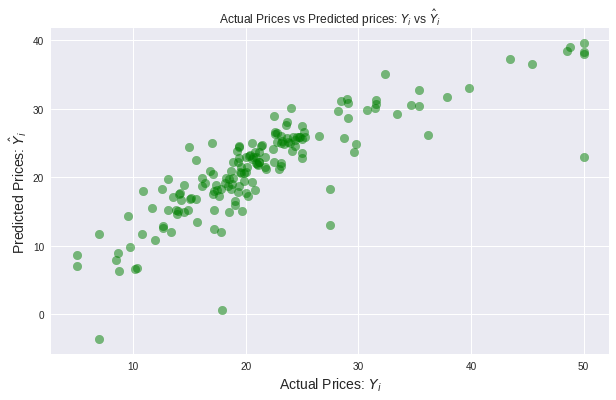

In [13]:
plt.figure(figsize=(10,6))
plt.rc('axes', labelsize=14) 
plt.scatter(y_test,y_pred,s=75,color="g",alpha=0.5)
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()


In [23]:
print(mean_squared_error(y_test, y_pred))

21.918527804270198


### The MSE obtained after using Sklearn's SGDRegressor = 21.918527804270198

- - -

## Creating a custom SGD Regressor.

In [0]:
class SGDRegressor(BaseEstimator):
    """
    Custom stochastic gradient descent
    algorithm for linear regression
    """
    def __init__(self,max_iter=1000, alpha=0.0001, tol=0.0001, batch_size=50):
        self.max_iter = max_iter
        self.alpha = alpha
        self.tol = tol
        self.batch_size = batch_size
        
        self.coef_ = None
        self.intercept_ = None
        
        # for debugging
        self.total_errors = []
        self.sample_errors = []
        self.coef_diffs = []
        self.intercept_diffs = []
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        rows, features = X.shape
        
        # Initialize coef and intercept
        self.coef_ = np.zeros(features)
        self.intercept_ = 0.0
        
        self.optimize(X, y)
        return self
    
    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_
    
    def sample(self, X, y):
        """
        returns a random sample of rows
        """
        idx = np.random.randint(X.shape[0], size=self.batch_size)
        return X[idx,:], y[idx]
    
    def compute_rms_error(self, X, y):
        return np.sqrt(np.sum((y - self.predict(X)) ** 2) / len(X))
    
    def optimize(self, X, y):
        """
        Optimizes the coef_ and intercept
        for lower squared errors
        """
        for i in range(1, self.max_iter + 1):
            
            # Save the error on whole dataset
            self.total_errors.append(self.compute_rms_error(X, y))
            
            # Save previous
            prev_coef = self.coef_
            prev_intercept = self.intercept_
            
            # Take a sample
            X_sample, y_sample = self.sample(X, y)
            
            # Save sample error
            self.sample_errors.append(self.compute_rms_error(X_sample, y_sample))
            
            pred = self.predict(X_sample)
            diff = y_sample - pred
            
            
            # compute gradients
            coef_grad = -2 * np.dot(X_sample.T, diff)
            intercept_grad = -2 * np.sum(diff)
            
            # update coef_ and intercept
            self.coef_ = self.coef_ - (self.alpha / i) * coef_grad
            self.intercept_ = self.intercept_ - (self.alpha / i) * intercept_grad
            
            # Compute diff of intercept and coef
            coef_diff = np.linalg.norm(self.coef_ - prev_coef)
            intercept_diff = self.intercept_ - prev_intercept
            
            # Save the difference
            self.coef_diffs.append(coef_diff)
            self.intercept_diffs.append(intercept_diff)
            
            # if diff is less than tolerence then terminate
            if coef_diff < self.tol and intercept_diff < self.tol:
                # Save final errors
                self.total_errors.append(self.compute_rms_error(X, y))
                self.sample_errors.append(self.compute_rms_error(X_sample, y_sample))
                break

In [0]:
sgd2 = SGDRegressor(max_iter=10000, alpha=0.005)
sgd2.fit(X_train,y_train)
y_pred2 = sgd2.predict(X_test)

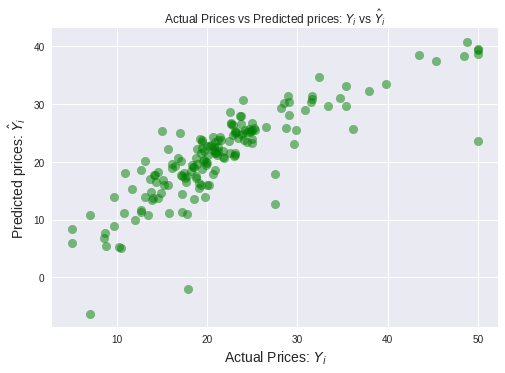

In [21]:
plt.scatter(y_test, y_pred2,s=75,color="g",alpha=0.5)
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [24]:
print(mean_squared_error(y_test, y_pred2))

22.57009082723169


### The MSE obtained after using Sklearn's SGDRegressor = 22.57009082723169

- - -

In [0]:
df = pd.DataFrame()

In [0]:
df['SGDRegressor'] = y_pred
df['Custom_SGDRegressor'] = y_pred2

# Conclusion

#### Comparison of Mean Squared Errors
* MSE using Sklearn's SGD Regressor : 21.918527804270198
* MSE using Sklearn's Custom SGDRegressor : 22.57009082723169

#### It could be observed that the custom SGDregressor model performs almost as good as the Sklearn's.

### Comparison of Weights

In [30]:
df.head()

,SGDRegressor,Custom_SGDRegressor
0,27.624149,27.924287
1,35.077487,34.636783
2,17.123584,16.979961
3,25.148069,24.681857
4,18.641102,18.900859


### It could be obeserved from the above table that both the model give almost similar results.